# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027209324e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133
# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.79856129989e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11
b1 max relative error: 2.738421e-09
W1 max relative error: 3.561318e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171496079387


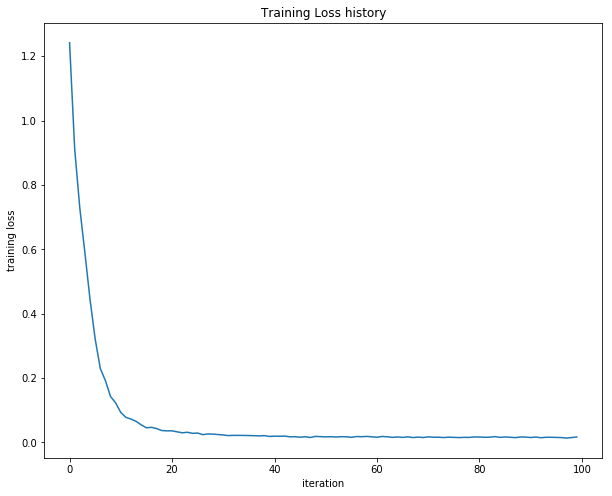

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=3000, batch_size=400,
            learning_rate=5e-4, learning_rate_decay=0.98,
            reg=0.05, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 3000: loss 2.302658
iteration 100 / 3000: loss 2.084527
iteration 200 / 3000: loss 1.959911
iteration 300 / 3000: loss 1.861424
iteration 400 / 3000: loss 1.744432
iteration 500 / 3000: loss 1.659307
iteration 600 / 3000: loss 1.692930
iteration 700 / 3000: loss 1.633846
iteration 800 / 3000: loss 1.596034
iteration 900 / 3000: loss 1.644403
iteration 1000 / 3000: loss 1.637267
iteration 1100 / 3000: loss 1.623264
iteration 1200 / 3000: loss 1.413756
iteration 1300 / 3000: loss 1.395844
iteration 1400 / 3000: loss 1.499324
iteration 1500 / 3000: loss 1.517775
iteration 1600 / 3000: loss 1.423722
iteration 1700 / 3000: loss 1.434558
iteration 1800 / 3000: loss 1.436495
iteration 1900 / 3000: loss 1.323154
iteration 2000 / 3000: loss 1.414770
iteration 2100 / 3000: loss 1.325402
iteration 2200 / 3000: loss 1.364087
iteration 2300 / 3000: loss 1.301015
iteration 2400 / 3000: loss 1.329382
iteration 2500 / 3000: loss 1.420143
iteration 2600 / 3000: loss 1.388840
iteration 270

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

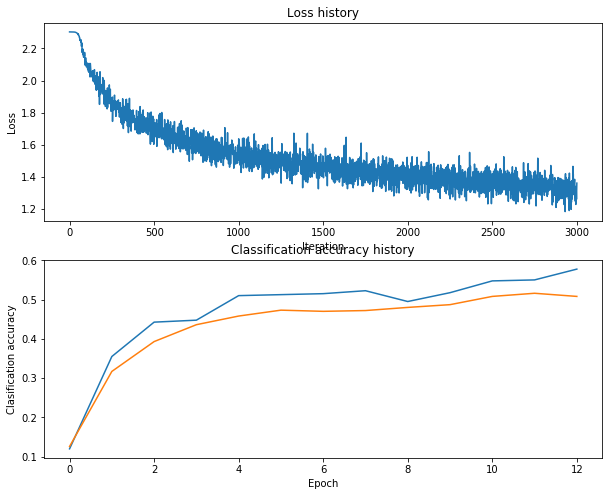

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

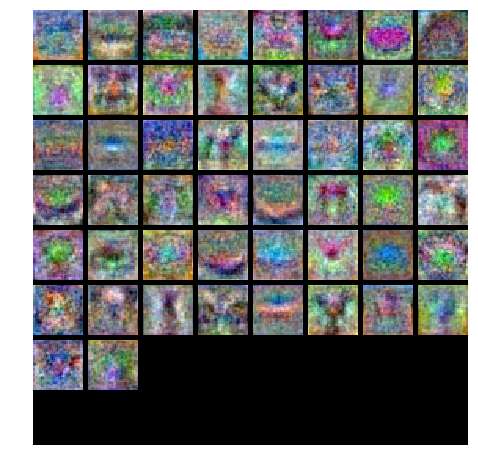

In [10]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [ ]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
input_size = 32 * 32 * 3
hidden_sizes = [50,100,300]
num_class = 10
learning_rates = [1e-4,5e-4,1e-3]
regularization_strengths = [0.1,1,10]
decay_rates = [0.75,0.85,0.9,0.95]
results = {}
best_val_accuracy = 0
for hs in hidden_sizes:
    for lr in learning_rates:
        for reg in regularization_strengths:
            for dr in decay_rates:
                print("hidden_size: ",hs,"learning_rate ",lr,"regularization_strength ",reg," :")
                nn = TwoLayerNet(input_size,hs,num_class)
                loss = nn.train(X_train,y_train,X_val,y_val,num_iters=2000,batch_size=400,learning_rate=lr,learning_rate_decay=dr,reg=reg,verbose=True)
                val_accuracy =(nn.predict(X_val) == y_val).mean()
                print("accuracy: ",val_accuracy)
                results[(dr,hs,lr,reg)] = val_accuracy
                if val_accuracy > best_val_accuracy:
                    best_val_accuracy = val_accuracy
                    best_net = nn
print("best accuray is : ",best_val_accuracy)
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

hidden_size:  50 learning_rate  0.0001 regularization_strength  0.1  :
iteration 0 / 2000: loss 2.302747
iteration 100 / 2000: loss 2.302474
iteration 200 / 2000: loss 2.300828
iteration 300 / 2000: loss 2.294803
iteration 400 / 2000: loss 2.282479
iteration 500 / 2000: loss 2.240609
iteration 600 / 2000: loss 2.189024
iteration 700 / 2000: loss 2.172909
iteration 800 / 2000: loss 2.158836
iteration 900 / 2000: loss 2.108999
iteration 1000 / 2000: loss 2.103295
iteration 1100 / 2000: loss 2.115747
iteration 1200 / 2000: loss 2.102244
iteration 1300 / 2000: loss 2.070110
iteration 1400 / 2000: loss 2.108892
iteration 1500 / 2000: loss 2.026397
iteration 1600 / 2000: loss 2.010607
iteration 1700 / 2000: loss 2.040323
iteration 1800 / 2000: loss 2.054453
iteration 1900 / 2000: loss 1.999386
accuracy:  0.255
hidden_size:  50 learning_rate  0.0001 regularization_strength  0.1  :
iteration 0 / 2000: loss 2.302753
iteration 100 / 2000: loss 2.302378
iteration 200 / 2000: loss 2.300085
iterati

iteration 100 / 2000: loss 2.313137
iteration 200 / 2000: loss 2.308223
iteration 300 / 2000: loss 2.298064
iteration 400 / 2000: loss 2.259619
iteration 500 / 2000: loss 2.217586
iteration 600 / 2000: loss 2.188376
iteration 700 / 2000: loss 2.189986
iteration 800 / 2000: loss 2.168160
iteration 900 / 2000: loss 2.155579
iteration 1000 / 2000: loss 2.138375
iteration 1100 / 2000: loss 2.150961
iteration 1200 / 2000: loss 2.145701
iteration 1300 / 2000: loss 2.175630
iteration 1400 / 2000: loss 2.145558
iteration 1500 / 2000: loss 2.063319
iteration 1600 / 2000: loss 2.105030
iteration 1700 / 2000: loss 2.158376
iteration 1800 / 2000: loss 2.118617
iteration 1900 / 2000: loss 2.138369
accuracy:  0.269
hidden_size:  50 learning_rate  0.0001 regularization_strength  10  :
iteration 0 / 2000: loss 2.318041
iteration 100 / 2000: loss 2.312815
iteration 200 / 2000: loss 2.307142
iteration 300 / 2000: loss 2.293411
iteration 400 / 2000: loss 2.244850
iteration 500 / 2000: loss 2.214269
itera

iteration 300 / 2000: loss 2.121828
iteration 400 / 2000: loss 2.115809
iteration 500 / 2000: loss 2.108752
iteration 600 / 2000: loss 2.132053
iteration 700 / 2000: loss 2.106567
iteration 800 / 2000: loss 2.081538
iteration 900 / 2000: loss 2.098375
iteration 1000 / 2000: loss 2.110109
iteration 1100 / 2000: loss 2.070279
iteration 1200 / 2000: loss 2.064041
iteration 1300 / 2000: loss 2.098661
iteration 1400 / 2000: loss 2.111123
iteration 1500 / 2000: loss 2.126561
iteration 1600 / 2000: loss 2.094452
iteration 1700 / 2000: loss 2.065737
iteration 1800 / 2000: loss 2.112806
iteration 1900 / 2000: loss 2.086459
accuracy:  0.335
hidden_size:  50 learning_rate  0.0005 regularization_strength  10  :
iteration 0 / 2000: loss 2.317902
iteration 100 / 2000: loss 2.224095
iteration 200 / 2000: loss 2.164597
iteration 300 / 2000: loss 2.082962
iteration 400 / 2000: loss 2.116950
iteration 500 / 2000: loss 2.078694
iteration 600 / 2000: loss 2.086667
iteration 700 / 2000: loss 2.145749
itera

iteration 500 / 2000: loss 1.654259
iteration 600 / 2000: loss 1.724101
iteration 700 / 2000: loss 1.673678
iteration 800 / 2000: loss 1.682578
iteration 900 / 2000: loss 1.734910
iteration 1000 / 2000: loss 1.641864
iteration 1100 / 2000: loss 1.612929
iteration 1200 / 2000: loss 1.668444
iteration 1300 / 2000: loss 1.638514
iteration 1400 / 2000: loss 1.641893
iteration 1500 / 2000: loss 1.639643
iteration 1600 / 2000: loss 1.627665
iteration 1700 / 2000: loss 1.602519
iteration 1800 / 2000: loss 1.614352
iteration 1900 / 2000: loss 1.554344
accuracy:  0.485
hidden_size:  50 learning_rate  0.001 regularization_strength  1  :
iteration 0 / 2000: loss 2.304112
iteration 100 / 2000: loss 1.950925
iteration 200 / 2000: loss 1.914877
iteration 300 / 2000: loss 1.765906
iteration 400 / 2000: loss 1.729863
iteration 500 / 2000: loss 1.649671
iteration 600 / 2000: loss 1.747429
iteration 700 / 2000: loss 1.705063
iteration 800 / 2000: loss 1.718818
iteration 900 / 2000: loss 1.679208
iterati

iteration 700 / 2000: loss 2.158622
iteration 800 / 2000: loss 2.151026
iteration 900 / 2000: loss 2.167312
iteration 1000 / 2000: loss 2.070997
iteration 1100 / 2000: loss 2.108859
iteration 1200 / 2000: loss 2.070304
iteration 1300 / 2000: loss 2.083362
iteration 1400 / 2000: loss 2.045252
iteration 1500 / 2000: loss 2.089720
iteration 1600 / 2000: loss 2.028482
iteration 1700 / 2000: loss 2.048413
iteration 1800 / 2000: loss 1.983314
iteration 1900 / 2000: loss 2.068645
accuracy:  0.262
hidden_size:  100 learning_rate  0.0001 regularization_strength  1  :
iteration 0 / 2000: loss 2.305669
iteration 100 / 2000: loss 2.305041
iteration 200 / 2000: loss 2.301981
iteration 300 / 2000: loss 2.284549
iteration 400 / 2000: loss 2.240912
iteration 500 / 2000: loss 2.196567
iteration 600 / 2000: loss 2.137549
iteration 700 / 2000: loss 2.142678
iteration 800 / 2000: loss 2.033242
iteration 900 / 2000: loss 2.007369
iteration 1000 / 2000: loss 2.028836
iteration 1100 / 2000: loss 2.008862
ite

iteration 800 / 2000: loss 1.624313
iteration 900 / 2000: loss 1.567127
iteration 1000 / 2000: loss 1.664193
iteration 1100 / 2000: loss 1.622746
iteration 1200 / 2000: loss 1.475388
iteration 1300 / 2000: loss 1.530916
iteration 1400 / 2000: loss 1.512172
iteration 1500 / 2000: loss 1.477941
iteration 1600 / 2000: loss 1.511893
iteration 1700 / 2000: loss 1.431814
iteration 1800 / 2000: loss 1.471633
iteration 1900 / 2000: loss 1.408283
accuracy:  0.48
hidden_size:  100 learning_rate  0.0005 regularization_strength  0.1  :
iteration 0 / 2000: loss 2.302900
iteration 100 / 2000: loss 2.102003
iteration 200 / 2000: loss 1.892948
iteration 300 / 2000: loss 1.803845
iteration 400 / 2000: loss 1.748366
iteration 500 / 2000: loss 1.659574
iteration 600 / 2000: loss 1.630915
iteration 700 / 2000: loss 1.561489
iteration 800 / 2000: loss 1.622772
iteration 900 / 2000: loss 1.568194
iteration 1000 / 2000: loss 1.556419
iteration 1100 / 2000: loss 1.462342
iteration 1200 / 2000: loss 1.501385
i

iteration 1000 / 2000: loss 1.508085
iteration 1100 / 2000: loss 1.463023
iteration 1200 / 2000: loss 1.505964
iteration 1300 / 2000: loss 1.483326
iteration 1400 / 2000: loss 1.576368
iteration 1500 / 2000: loss 1.419378
iteration 1600 / 2000: loss 1.411007
iteration 1700 / 2000: loss 1.468787
iteration 1800 / 2000: loss 1.530351
iteration 1900 / 2000: loss 1.481933
accuracy:  0.499
hidden_size:  100 learning_rate  0.001 regularization_strength  0.1  :
iteration 0 / 2000: loss 2.302895
iteration 100 / 2000: loss 1.950445
iteration 200 / 2000: loss 1.780412
iteration 300 / 2000: loss 1.751340
iteration 400 / 2000: loss 1.605906
iteration 500 / 2000: loss 1.546460
iteration 600 / 2000: loss 1.458290
iteration 700 / 2000: loss 1.560899
iteration 800 / 2000: loss 1.526692
iteration 900 / 2000: loss 1.451077
iteration 1000 / 2000: loss 1.451820
iteration 1100 / 2000: loss 1.400061
iteration 1200 / 2000: loss 1.394582
iteration 1300 / 2000: loss 1.500511
iteration 1400 / 2000: loss 1.357742

iteration 1200 / 2000: loss 2.118654
iteration 1300 / 2000: loss 2.132100
iteration 1400 / 2000: loss 2.097361
iteration 1500 / 2000: loss 2.078941
iteration 1600 / 2000: loss 2.072356
iteration 1700 / 2000: loss 2.157184
iteration 1800 / 2000: loss 2.097027
iteration 1900 / 2000: loss 2.116536
accuracy:  0.356
hidden_size:  100 learning_rate  0.001 regularization_strength  10  :
iteration 0 / 2000: loss 2.333326
iteration 100 / 2000: loss 2.082865
iteration 200 / 2000: loss 2.122820
iteration 300 / 2000: loss 2.086961
iteration 400 / 2000: loss 2.091113
iteration 500 / 2000: loss 2.101206
iteration 600 / 2000: loss 2.052699
iteration 700 / 2000: loss 2.150076
iteration 800 / 2000: loss 2.120876
iteration 900 / 2000: loss 2.104706
iteration 1000 / 2000: loss 2.121077
iteration 1100 / 2000: loss 2.092577
iteration 1200 / 2000: loss 2.092337
iteration 1300 / 2000: loss 2.098096
iteration 1400 / 2000: loss 2.143139
iteration 1500 / 2000: loss 2.058313
iteration 1600 / 2000: loss 2.099890


iteration 1300 / 2000: loss 2.156893
iteration 1400 / 2000: loss 2.157635
iteration 1500 / 2000: loss 2.117029
iteration 1600 / 2000: loss 2.163875
iteration 1700 / 2000: loss 2.121363
iteration 1800 / 2000: loss 2.175866
iteration 1900 / 2000: loss 2.153853
accuracy:  0.245
hidden_size:  300 learning_rate  0.0001 regularization_strength  10  :
iteration 0 / 2000: loss 2.395001
iteration 100 / 2000: loss 2.366672
iteration 200 / 2000: loss 2.338342
iteration 300 / 2000: loss 2.294958
iteration 400 / 2000: loss 2.250657
iteration 500 / 2000: loss 2.227059
iteration 600 / 2000: loss 2.186734
iteration 700 / 2000: loss 2.162304
iteration 800 / 2000: loss 2.146265
iteration 900 / 2000: loss 2.180486
iteration 1000 / 2000: loss 2.178408
iteration 1100 / 2000: loss 2.167618
iteration 1200 / 2000: loss 2.143853
iteration 1300 / 2000: loss 2.175272
iteration 1400 / 2000: loss 2.097388
iteration 1500 / 2000: loss 2.107238
iteration 1600 / 2000: loss 2.111324
iteration 1700 / 2000: loss 2.119722

iteration 1400 / 2000: loss 1.613424
iteration 1500 / 2000: loss 1.574843
iteration 1600 / 2000: loss 1.630916
iteration 1700 / 2000: loss 1.610668
iteration 1800 / 2000: loss 1.603288
iteration 1900 / 2000: loss 1.689486
accuracy:  0.466
hidden_size:  300 learning_rate  0.0005 regularization_strength  1  :
iteration 0 / 2000: loss 2.311888
iteration 100 / 2000: loss 2.109242
iteration 200 / 2000: loss 1.910644
iteration 300 / 2000: loss 1.909953
iteration 400 / 2000: loss 1.781256
iteration 500 / 2000: loss 1.801279
iteration 600 / 2000: loss 1.749303
iteration 700 / 2000: loss 1.758400
iteration 800 / 2000: loss 1.707512
iteration 900 / 2000: loss 1.628746
iteration 1000 / 2000: loss 1.657534
iteration 1100 / 2000: loss 1.612525
iteration 1200 / 2000: loss 1.545487
iteration 1300 / 2000: loss 1.671146
iteration 1400 / 2000: loss 1.621615
iteration 1500 / 2000: loss 1.639495
iteration 1600 / 2000: loss 1.592004
iteration 1700 / 2000: loss 1.666777
iteration 1800 / 2000: loss 1.567422


iteration 1500 / 2000: loss 1.602440
iteration 1600 / 2000: loss 1.639972
iteration 1700 / 2000: loss 1.716323
iteration 1800 / 2000: loss 1.585717
iteration 1900 / 2000: loss 1.607688
accuracy:  0.468
hidden_size:  300 learning_rate  0.001 regularization_strength  1  :
iteration 0 / 2000: loss 2.311767
iteration 100 / 2000: loss 1.938065
iteration 200 / 2000: loss 1.818982
iteration 300 / 2000: loss 1.769920
iteration 400 / 2000: loss 1.746869
iteration 500 / 2000: loss 1.685888
iteration 600 / 2000: loss 1.678879
iteration 700 / 2000: loss 1.609363
iteration 800 / 2000: loss 1.666459
iteration 900 / 2000: loss 1.604930
iteration 1000 / 2000: loss 1.667918
iteration 1100 / 2000: loss 1.605909
iteration 1200 / 2000: loss 1.576864
iteration 1300 / 2000: loss 1.676061
iteration 1400 / 2000: loss 1.726887
iteration 1500 / 2000: loss 1.638854
iteration 1600 / 2000: loss 1.554501
iteration 1700 / 2000: loss 1.599318
iteration 1800 / 2000: loss 1.584198
iteration 1900 / 2000: loss 1.602209
a

In [12]:
for dr,hs,lr,reg in sorted(results):
    print("decay_rate: ",dr," hidden_size: ",hs," learning_rate: ",lr," reg: ",reg," accuracy: ", results[(dr,hs,lr,reg)])

decay_rate:  0.9  hidden_size:  300  learning_rate:  0.001  reg:  10  accuracy:  0.345


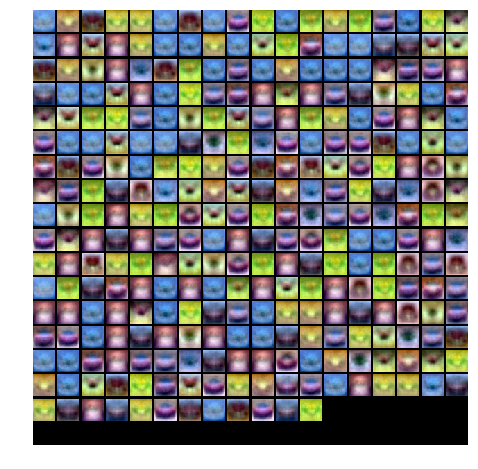

In [13]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [14]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.345
